In [18]:
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [6]:
# prepare data
input_dir = 'image_classifier_data/clf-data/'
categories = ['empty', 'not_empty']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

In [7]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [8]:
#train
classifier = SVC()
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [9]:
#test
best_estimator = grid_search.best_estimator_
y_prediction = best_estimator.predict(x_test)
score = accuracy_score(y_prediction, y_test)
print('{}% of samples were correctly classified'.format(str(score * 100)))
pickle.dump(best_estimator, open('./model.p', 'wb'))

100.0% of samples were correctly classified


In [14]:
cm = confusion_matrix(y_test, y_prediction, labels=categories)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ValueError: At least one label specified must be in y_true

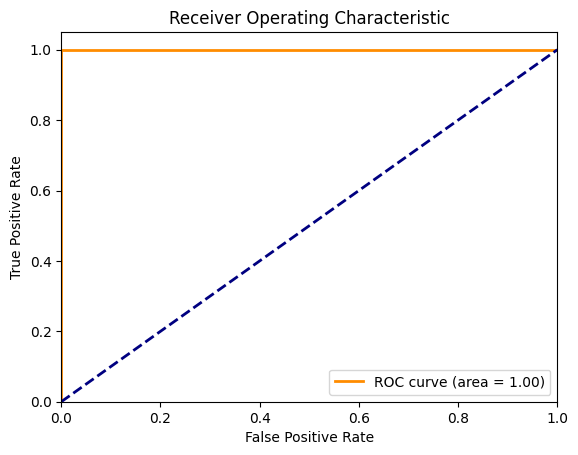

In [17]:
#ROC-AUC curve
y_scores = best_estimator.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

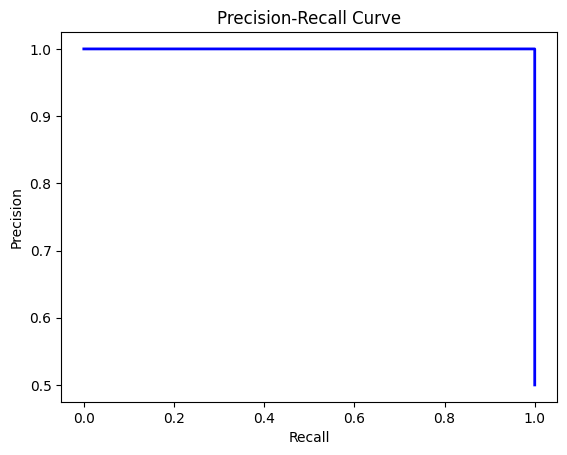

In [19]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [22]:
#Misclassification examples
misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_test, y_prediction)) if true != pred]

plt.figure()
for i, idx in enumerate(misclassified_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f'True: {y_test[idx]}\nPred: {y_prediction[idx]}')
    plt.axis('off')

plt.show()

<Figure size 640x480 with 0 Axes>